In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data

In [3]:
df = pd.read_csv("Part1_Crime_Beta_5307206680000182585.csv",low_memory=False)
df.head()

,RowID,CCNumber,CrimeDateTime,CrimeCode,Description,Inside_Outside,Weapon,Post,Gender,Age,...,Old_District,New_District,Neighborhood,Latitude,Longitude,GeoLocation,PremiseType,Total_Incidents,x,y
0,1,15D05728,4/14/2015 3:20:00 PM,4E,COMMON ASSAULT,NaN,NaN,431,M,15.0,...,NORTHEAST,NaN,MAYFIELD,39.331378,-76.580758,"(39.331377771562259,-76.580758075098444)",PARK,1,-76.580758,39.331378
1,2,15D05705,4/14/2015 3:00:00 PM,6H,LARCENY,NaN,NaN,731,F,37.0,...,WESTERN,NaN,MONDAWMIN,39.318693,-76.654400,"(39.318692922502528,-76.654399892134563)",ATM MACHINES,1,-76.654400,39.318693
2,3,15D06020,4/14/2015 1:30:00 PM,7C,AUTO THEFT,NaN,NaN,523,F,54.0,...,NORTHERN,NaN,MID-GOVANS,39.355620,-76.609304,"(39.355620323353733,-76.609303524127284)",PARKING LOT-OUTSIDE,1,-76.609304,39.355620
3,4,15D05509,4/14/2015 3:07:00 AM,6D,LARCENY FROM AUTO,NaN,NaN,442,F,33.0,...,NORTHEAST,NaN,PARKSIDE,39.324435,-76.560800,"(39.324435277970515,-76.560799952610424)",STREET,1,-76.560800,39.324435
4,5,15D05895,4/14/2015 10:10:00 PM,5A,BURGLARY,NaN,NaN,311,F,26.0,...,EASTERN,NaN,GREENMOUNT WEST,39.311000,-76.611729,"(39.310999868123808,-76.61172934261586)",APT/CONDO - OCCUPIED,1,-76.611729,39.311000


In [4]:
df.shape

(638033, 23)

no of rows = 638033

no of columns = 23

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638033 entries, 0 to 638032
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   RowID            638033 non-null  int64  
 1   CCNumber         638033 non-null  object 
 2   CrimeDateTime    638033 non-null  object 
 3   CrimeCode        638033 non-null  object 
 4   Description      638033 non-null  object 
 5   Inside_Outside   37723 non-null   object 
 6   Weapon           166723 non-null  object 
 7   Post             629894 non-null  object 
 8   Gender           536109 non-null  object 
 9   Age              515351 non-null  float64
 10  Race             607177 non-null  object 
 11  Ethnicity        110769 non-null  object 
 12  Location         634312 non-null  object 
 13  Old_District     566413 non-null  object 
 14  New_District     63563 non-null   object 
 15  Neighborhood     629097 non-null  object 
 16  Latitude         636700 non-null  floa

In [7]:
df.columns

Index(['RowID', 'CCNumber', 'CrimeDateTime', 'CrimeCode', 'Description',
       'Inside_Outside', 'Weapon', 'Post', 'Gender', 'Age', 'Race',
       'Ethnicity', 'Location', 'Old_District', 'New_District', 'Neighborhood',
       'Latitude', 'Longitude', 'GeoLocation', 'PremiseType',
       'Total_Incidents', 'x', 'y'],
      dtype='object')

# Droping unnecessary columns 

In [9]:
drop_columns = ['x','y','RowID','CCNumber','CrimeCode','Post','Location','Neighborhood','New_District','GeoLocation','Total_Incidents','PremiseType']
df1 = df.drop(drop_columns,axis=1)
df1.head()

,CrimeDateTime,Description,Inside_Outside,Weapon,Gender,Age,Race,Ethnicity,Old_District,Latitude,Longitude
0,4/14/2015 3:20:00 PM,COMMON ASSAULT,NaN,NaN,M,15.0,BLACK_OR_AFRICAN_AMERICAN,NaN,NORTHEAST,39.331378,-76.580758
1,4/14/2015 3:00:00 PM,LARCENY,NaN,NaN,F,37.0,BLACK_OR_AFRICAN_AMERICAN,NaN,WESTERN,39.318693,-76.654400
2,4/14/2015 1:30:00 PM,AUTO THEFT,NaN,NaN,F,54.0,BLACK_OR_AFRICAN_AMERICAN,NaN,NORTHERN,39.355620,-76.609304
3,4/14/2015 3:07:00 AM,LARCENY FROM AUTO,NaN,NaN,F,33.0,BLACK_OR_AFRICAN_AMERICAN,NaN,NORTHEAST,39.324435,-76.560800
4,4/14/2015 10:10:00 PM,BURGLARY,NaN,NaN,F,26.0,BLACK_OR_AFRICAN_AMERICAN,NaN,EASTERN,39.311000,-76.611729


# Check for nulls

In [11]:
df1.isnull().sum()

CrimeDateTime          0
Description            0
Inside_Outside    600310
Weapon            471310
Gender            101924
Age               122682
Race               30856
Ethnicity         527264
Old_District       71620
Latitude            1333
Longitude           1333
dtype: int64

In [12]:
# Percentage of nulls
df1.isnull().sum().map(lambda r:(r/len(df1))*100)

CrimeDateTime      0.000000
Description        0.000000
Inside_Outside    94.087610
Weapon            73.869220
Gender            15.974722
Age               19.228159
Race               4.836113
Ethnicity         82.638986
Old_District      11.225125
Latitude           0.208923
Longitude          0.208923
dtype: float64

As the columns 'Weapons,'Inside_Outside' and 'Ethnicity' have null percentages exceeding 70% and irrelevant , the decision is to eliminate these columns instead of attempting to fill the missing values.

In [14]:
df1 = df1.drop(['Weapon','Ethnicity','Inside_Outside'],axis=1)
df1.head()

,CrimeDateTime,Description,Gender,Age,Race,Old_District,Latitude,Longitude
0,4/14/2015 3:20:00 PM,COMMON ASSAULT,M,15.0,BLACK_OR_AFRICAN_AMERICAN,NORTHEAST,39.331378,-76.580758
1,4/14/2015 3:00:00 PM,LARCENY,F,37.0,BLACK_OR_AFRICAN_AMERICAN,WESTERN,39.318693,-76.654400
2,4/14/2015 1:30:00 PM,AUTO THEFT,F,54.0,BLACK_OR_AFRICAN_AMERICAN,NORTHERN,39.355620,-76.609304
3,4/14/2015 3:07:00 AM,LARCENY FROM AUTO,F,33.0,BLACK_OR_AFRICAN_AMERICAN,NORTHEAST,39.324435,-76.560800
4,4/14/2015 10:10:00 PM,BURGLARY,F,26.0,BLACK_OR_AFRICAN_AMERICAN,EASTERN,39.311000,-76.611729


In [15]:
df1.isnull().sum().map(lambda r:(r/len(df1))*100)

CrimeDateTime     0.000000
Description       0.000000
Gender           15.974722
Age              19.228159
Race              4.836113
Old_District     11.225125
Latitude          0.208923
Longitude         0.208923
dtype: float64

In [16]:
df1.Latitude.describe()

count    636700.000000
mean         38.896965
std           4.000934
min         -76.657031
25%          39.287592
50%          39.302262
75%          39.326560
max          39.375381
Name: Latitude, dtype: float64

In [17]:
df1.Longitude.describe()

count    636700.000000
mean        -75.819649
std           7.779735
min         -76.728558
25%         -76.648379
50%         -76.613547
75%         -76.585985
max          39.296969
Name: Longitude, dtype: float64

In [18]:
df1[(df1.Longitude == 0) & (df1.Latitude == 0) ]

,CrimeDateTime,Description,Gender,Age,Race,Old_District,Latitude,Longitude
41,9/7/2013 5:30:00 PM,AUTO THEFT,F,49.0,BLACK_OR_AFRICAN_AMERICAN,NaN,0.0,0.0
220,7/16/2013 10:30:00 PM,AGG. ASSAULT,F,24.0,UNKNOWN,NaN,0.0,0.0
281,4/8/2015 7:30:00 PM,AGG. ASSAULT,M,47.0,BLACK_OR_AFRICAN_AMERICAN,NaN,0.0,0.0
387,8/30/2013 5:00:00 PM,LARCENY FROM AUTO,F,44.0,BLACK_OR_AFRICAN_AMERICAN,NaN,0.0,0.0
467,4/2/2015 9:58:00 PM,AGG. ASSAULT,F,37.0,BLACK_OR_AFRICAN_AMERICAN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...
637102,10/13/2013 2:00:00 PM,COMMON ASSAULT,F,17.0,UNKNOWN,NaN,0.0,0.0
637287,11/15/2015 7:30:00 PM,AUTO THEFT,F,27.0,BLACK_OR_AFRICAN_AMERICAN,NaN,0.0,0.0
637332,9/13/2013 9:54:00 PM,AGG. ASSAULT,F,29.0,BLACK_OR_AFRICAN_AMERICAN,NaN,0.0,0.0
637452,10/30/2013 2:00:00 PM,LARCENY,NaN,NaN,UNKNOWN,NaN,0.0,0.0


Certain rows exhibit latitude and longitude values of 0, which is illogical for data collected in Baltimore City. Hence, these entries will be removed.

In [20]:
df1 = df1[(df1.Latitude!=0)|(df1.Longitude!=0)]

In [21]:
df1.Latitude.describe()

count    630078.000000
mean         39.305765
std           0.327867
min         -76.657031
25%          39.287975
50%          39.302818
75%          39.326959
max          39.375381
Name: Latitude, dtype: float64

In [22]:
df1.Longitude.describe()

count    630078.000000
mean        -76.616500
std           0.329264
min         -76.728558
25%         -76.648777
50%         -76.614008
75%         -76.587383
max          39.296969
Name: Longitude, dtype: float64

If we look at the descrptive stats of the columns Latitude and Longitude, means and medians of these columns are almost equal so nulls can be filled by mean or median.

In [24]:
df1.Latitude = df1.Latitude.fillna(value=df1.Latitude.median())
df1.Longitude = df1.Longitude.fillna(value=df1.Longitude.median())

In [25]:
df1.Age.describe()

count    509898.000000
mean         37.933585
std          34.808103
min       -7979.000000
25%          26.000000
50%          35.000000
75%          49.000000
max        8251.000000
Name: Age, dtype: float64

In [26]:
df1[(df1.Age<=7) | (df1.Age>100)]

,CrimeDateTime,Description,Gender,Age,Race,Old_District,Latitude,Longitude
152,11/23/2013 12:00:00 AM,AGG. ASSAULT,M,5.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHERN,39.250175,-76.617615
426,7/17/2013 7:00:00 PM,COMMON ASSAULT,F,5.0,WHITE,SOUTHERN,39.231310,-76.602764
435,11/4/2013 7:45:00 AM,COMMON ASSAULT,M,0.0,BLACK_OR_AFRICAN_AMERICAN,NORTHEAST,39.321925,-76.573671
557,8/6/2013 5:00:00 PM,COMMON ASSAULT,F,6.0,UNKNOWN,NORTHEAST,39.305192,-76.553149
678,8/12/2015 5:50:00 PM,LARCENY,M,6.0,WHITE,SOUTHEAST,39.292725,-76.572194
...,...,...,...,...,...,...,...,...
636824,11/13/2013 10:05:00 PM,ROBBERY,M,6.0,BLACK_OR_AFRICAN_AMERICAN,NORTHERN,39.348006,-76.664281
637420,10/21/2013 7:40:00 PM,LARCENY,F,6.0,UNKNOWN,EASTERN,39.309520,-76.562767
637447,10/30/2013 5:45:00 PM,COMMON ASSAULT,F,2.0,BLACK_OR_AFRICAN_AMERICAN,WESTERN,39.310396,-76.639604
638002,10/3/2013 9:46:00 PM,AGG. ASSAULT,F,0.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHERN,39.285083,-76.645420


 There are some entries which has age less than 0 and certain entries has age value in thousands. As age cant be in negative and  that high, considering only age range of 8 - 100 and droping of all other entries.

In [28]:
df1 = df1[(df1.Age>7) & (df1.Age<100)]

In [29]:
df1.Age.describe()

count    506878.000000
mean         38.194307
std          15.493527
min           8.000000
25%          26.000000
50%          35.000000
75%          49.000000
max          99.000000
Name: Age, dtype: float64

In [30]:
#filling the nulls with medians for column Age

In [31]:
df1.Age = df1.Age.fillna(value = df1.Age.median())

In [32]:
#filling categorical variables with mode

In [33]:
df1.Old_District = df1.Old_District.fillna(value = df1.Old_District.mode()[0])
df1.Gender = df1.Gender.fillna(value = df1.Gender.mode()[0])
df1.Race = df1.Race.fillna(value = df1.Race.mode()[0])

In [34]:
#nulls after filling 
df1.isnull().sum()

CrimeDateTime    0
Description      0
Gender           0
Age              0
Race             0
Old_District     0
Latitude         0
Longitude        0
dtype: int64

In [35]:
df1_num = df1.select_dtypes(include = np.number)
df1_num.head()

,Age,Latitude,Longitude
0,15.0,39.331378,-76.580758
1,37.0,39.318693,-76.654400
2,54.0,39.355620,-76.609304
3,33.0,39.324435,-76.560800
4,26.0,39.311000,-76.611729


# Check for outliers

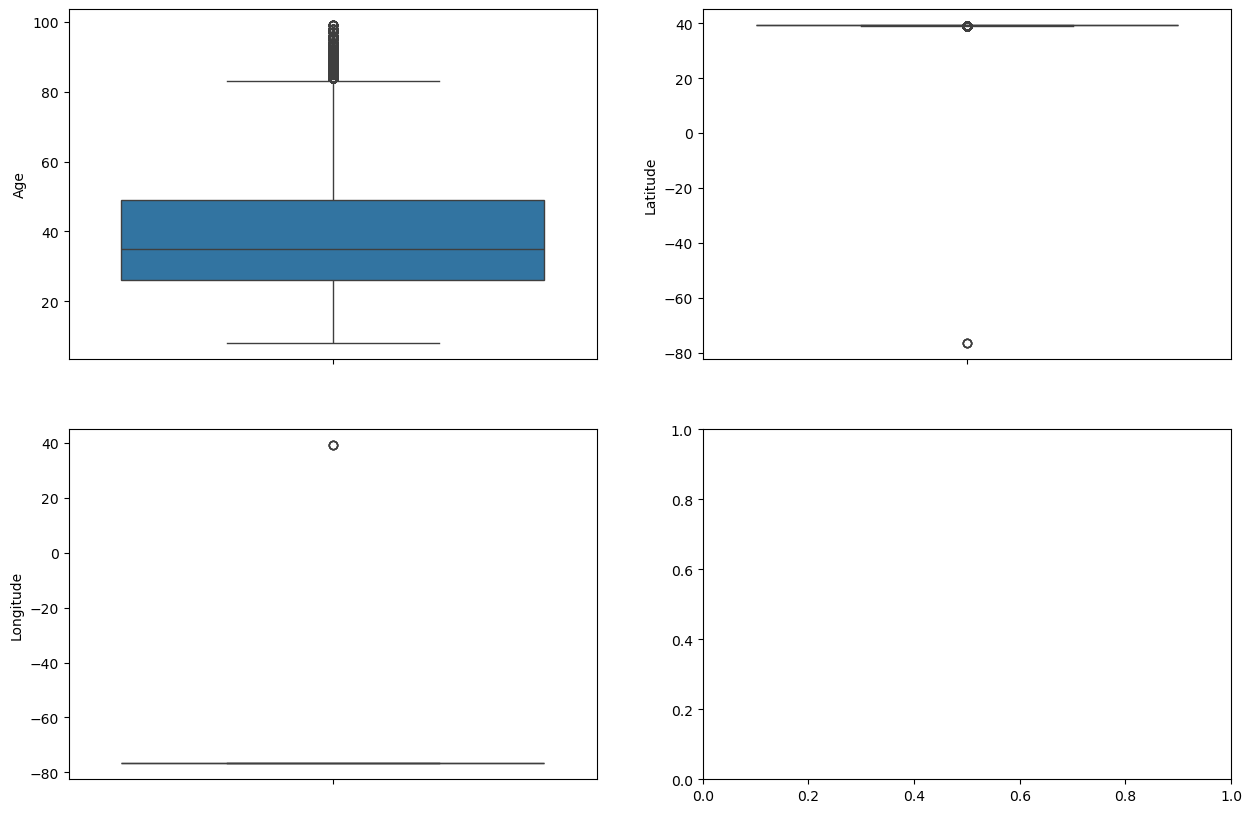

In [37]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(15,10))
for v,s in zip(df1_num.columns,ax.flatten()):
    sns.boxplot(df1_num[v],ax=s)
plt.show()

Even though there are few outliers in columns 'Age' and 'Latitude', as there are only few, not treating them.

Converting description column into target by encoding the column. Considering Rape,Shooting,homicide,arson, Aggravated Assault,BURGLARY as violent crimes and encoding them as 1 and remaining else 0.

In [40]:
def violent_encod(value):
    if value in ['RAPE','HOMICIDE','ARSON','SHOOTING','BURGLARY','AGG. ASSAULT']:
        return 1
    else:
        return 0

In [41]:
df1['violent_crime'] = df.Description.apply(violent_encod)
df1.violent_crime.value_counts()

violent_crime
0    365824
1    141054
Name: count, dtype: int64

In [42]:
df1.head()

,CrimeDateTime,Description,Gender,Age,Race,Old_District,Latitude,Longitude,violent_crime
0,4/14/2015 3:20:00 PM,COMMON ASSAULT,M,15.0,BLACK_OR_AFRICAN_AMERICAN,NORTHEAST,39.331378,-76.580758,0
1,4/14/2015 3:00:00 PM,LARCENY,F,37.0,BLACK_OR_AFRICAN_AMERICAN,WESTERN,39.318693,-76.654400,0
2,4/14/2015 1:30:00 PM,AUTO THEFT,F,54.0,BLACK_OR_AFRICAN_AMERICAN,NORTHERN,39.355620,-76.609304,0
3,4/14/2015 3:07:00 AM,LARCENY FROM AUTO,F,33.0,BLACK_OR_AFRICAN_AMERICAN,NORTHEAST,39.324435,-76.560800,0
4,4/14/2015 10:10:00 PM,BURGLARY,F,26.0,BLACK_OR_AFRICAN_AMERICAN,EASTERN,39.311000,-76.611729,1


# Checking categorical data for anamolies

In [44]:
df1.Gender.value_counts()

Gender
F    268336
M    237225
U      1317
Name: count, dtype: int64

There are lot of classes in the variable 'Gender'. Converting all of them into 3 categories 'M','F','U'.

In [46]:
def gend_conv(value):
    if value in ['Male','M']:
        return 'M'
    elif value in ['Female','F']:
        return 'F'
    else:
        return 'U'

In [47]:
df1.Gender = df1.Gender.apply(gend_conv)
df1.Gender.value_counts()

Gender
F    268336
M    237225
U      1317
Name: count, dtype: int64

In [48]:
df1.Race.value_counts()

Race
BLACK_OR_AFRICAN_AMERICAN                    330052
WHITE                                        125554
UNKNOWN                                       47417
ASIAN                                          2348
AMERICAN_INDIAN_OR_ALASKA_NATIVE                938
NATIVE_HAWAIIAN_OR_OTHER_PACIFIC_ISLANDER       569
Name: count, dtype: int64

In [49]:
df1.Old_District.value_counts()

Old_District
NORTHEAST    125712
SOUTHEAST     62673
CENTRAL       51108
SOUTHERN      50851
NORTHERN      47142
SOUTHWEST     46301
NORTHWEST     45315
EASTERN       40392
WESTERN       37384
Name: count, dtype: int64

In [50]:
df1 = df1[(df1.Old_District != 'NWD') & (df1.Old_District != 'ND')]

In [51]:
df1.Old_District.value_counts()

Old_District
NORTHEAST    125712
SOUTHEAST     62673
CENTRAL       51108
SOUTHERN      50851
NORTHERN      47142
SOUTHWEST     46301
NORTHWEST     45315
EASTERN       40392
WESTERN       37384
Name: count, dtype: int64

# Visualizations

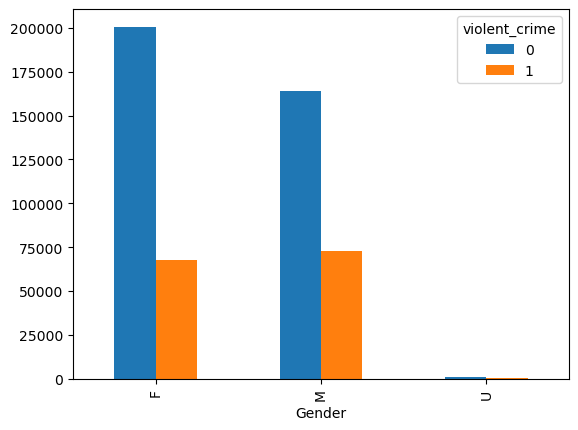

In [53]:
pd.crosstab(index=df1.Gender,columns=df1.violent_crime).plot(kind='bar')
plt.show()

In [54]:
df1.columns

Index(['CrimeDateTime', 'Description', 'Gender', 'Age', 'Race', 'Old_District',
       'Latitude', 'Longitude', 'violent_crime'],
      dtype='object')

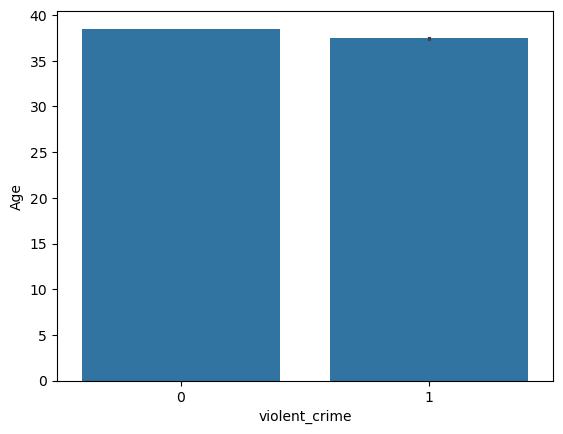

In [55]:
sns.barplot(x='violent_crime', y='Age', data=df1)
plt.show()


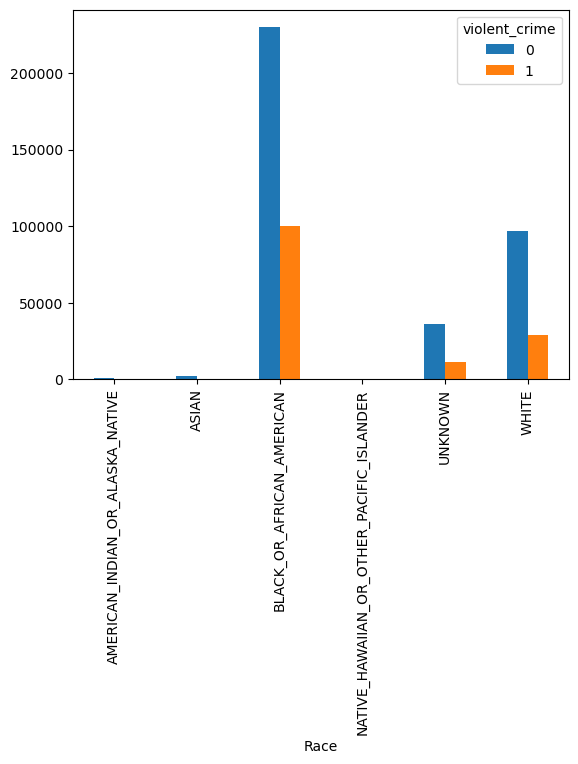

In [56]:
pd.crosstab(index = df1.Race,columns = df1.violent_crime).plot(kind='bar')
plt.show()

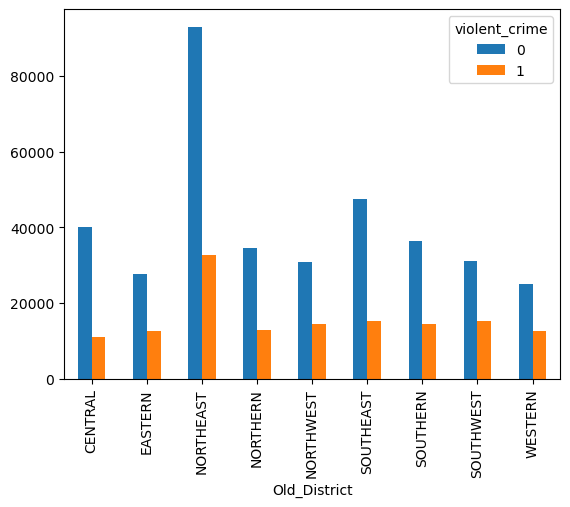

In [57]:
pd.crosstab(index = df1.Old_District,columns = df1.violent_crime).plot(kind='bar')
plt.show()

In [58]:
df1.head()

,CrimeDateTime,Description,Gender,Age,Race,Old_District,Latitude,Longitude,violent_crime
0,4/14/2015 3:20:00 PM,COMMON ASSAULT,M,15.0,BLACK_OR_AFRICAN_AMERICAN,NORTHEAST,39.331378,-76.580758,0
1,4/14/2015 3:00:00 PM,LARCENY,F,37.0,BLACK_OR_AFRICAN_AMERICAN,WESTERN,39.318693,-76.654400,0
2,4/14/2015 1:30:00 PM,AUTO THEFT,F,54.0,BLACK_OR_AFRICAN_AMERICAN,NORTHERN,39.355620,-76.609304,0
3,4/14/2015 3:07:00 AM,LARCENY FROM AUTO,F,33.0,BLACK_OR_AFRICAN_AMERICAN,NORTHEAST,39.324435,-76.560800,0
4,4/14/2015 10:10:00 PM,BURGLARY,F,26.0,BLACK_OR_AFRICAN_AMERICAN,EASTERN,39.311000,-76.611729,1


# Extracting Year, Month, Date, and hour from the column 'CrimeDateTime'

In [60]:
# Convert to datetime format
df1['CrimeDateTime'] = pd.to_datetime(df1['CrimeDateTime'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# Extract components
df1['Year'] = df1['CrimeDateTime'].dt.year
df1['Month'] = df1['CrimeDateTime'].dt.month
df1['Day'] = df1['CrimeDateTime'].dt.day
df1['time_hour'] = df1['CrimeDateTime'].dt.hour

In [61]:
df1.head()

,CrimeDateTime,Description,Gender,Age,Race,Old_District,Latitude,Longitude,violent_crime,Year,Month,Day,time_hour
0,2015-04-14 15:20:00,COMMON ASSAULT,M,15.0,BLACK_OR_AFRICAN_AMERICAN,NORTHEAST,39.331378,-76.580758,0,2015.0,4.0,14.0,15.0
1,2015-04-14 15:00:00,LARCENY,F,37.0,BLACK_OR_AFRICAN_AMERICAN,WESTERN,39.318693,-76.654400,0,2015.0,4.0,14.0,15.0
2,2015-04-14 13:30:00,AUTO THEFT,F,54.0,BLACK_OR_AFRICAN_AMERICAN,NORTHERN,39.355620,-76.609304,0,2015.0,4.0,14.0,13.0
3,2015-04-14 03:07:00,LARCENY FROM AUTO,F,33.0,BLACK_OR_AFRICAN_AMERICAN,NORTHEAST,39.324435,-76.560800,0,2015.0,4.0,14.0,3.0
4,2015-04-14 22:10:00,BURGLARY,F,26.0,BLACK_OR_AFRICAN_AMERICAN,EASTERN,39.311000,-76.611729,1,2015.0,4.0,14.0,22.0


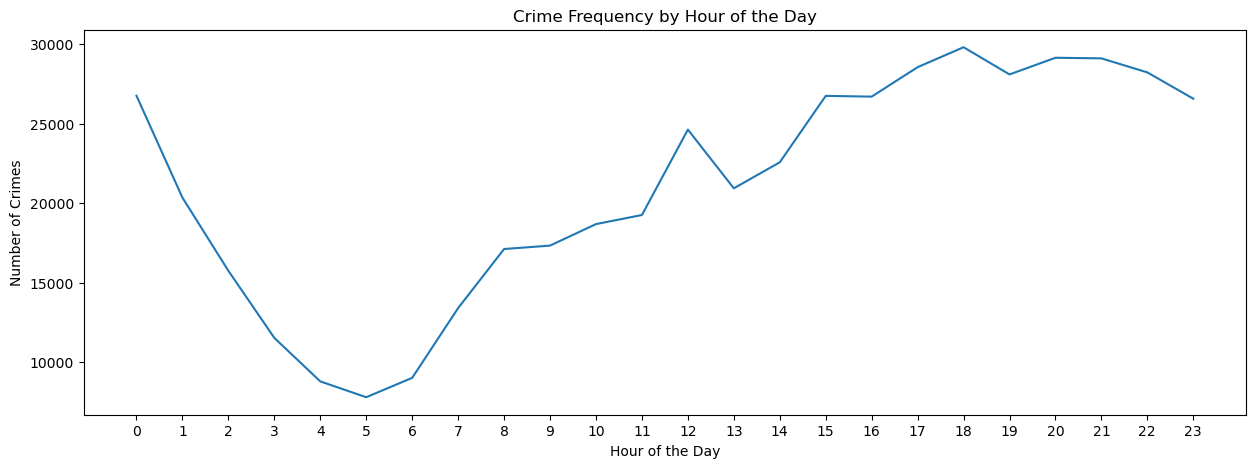

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

hour = list(df1.time_hour.value_counts().index)
no_of_crimes = list(df1.time_hour.value_counts().values)

plt.figure(figsize=(15, 5))
sns.lineplot(x=hour, y=no_of_crimes)  # Use keyword arguments
plt.xticks(hour)  # Ensure all hour values are displayed
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.title('Crime Frequency by Hour of the Day')
plt.show()


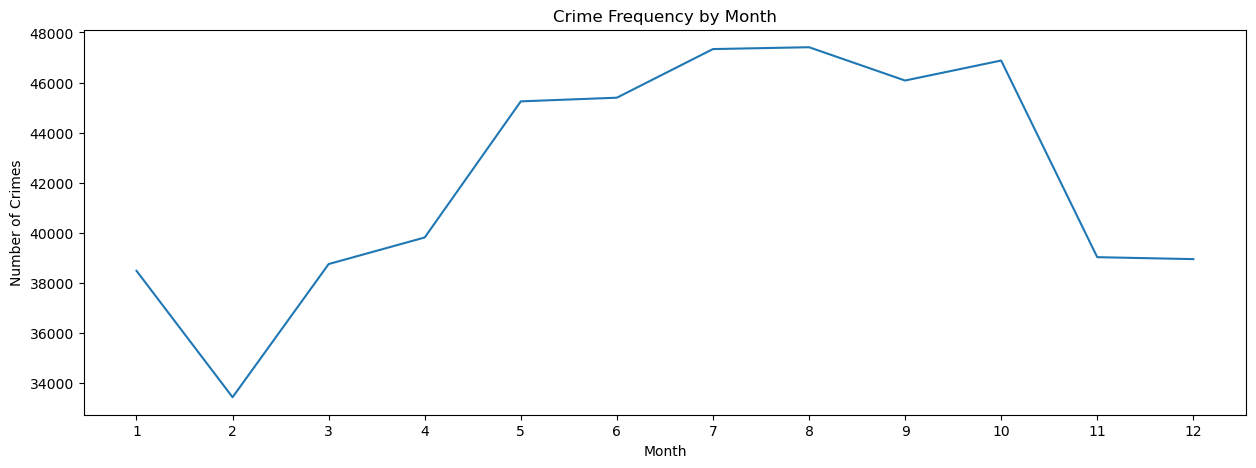

In [63]:
month = list(df1.Month.value_counts().index)
no_of_crimes = list(df1.Month.value_counts().values)

plt.figure(figsize=(15, 5))
sns.lineplot(x=month, y=no_of_crimes)  # Use keyword arguments
plt.xticks(month)  # Ensures all months are displayed on the x-axis
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Crime Frequency by Month')
plt.show()


Considering only data from year 2011

In [65]:
df1 = df1[df1.Year>=2011]

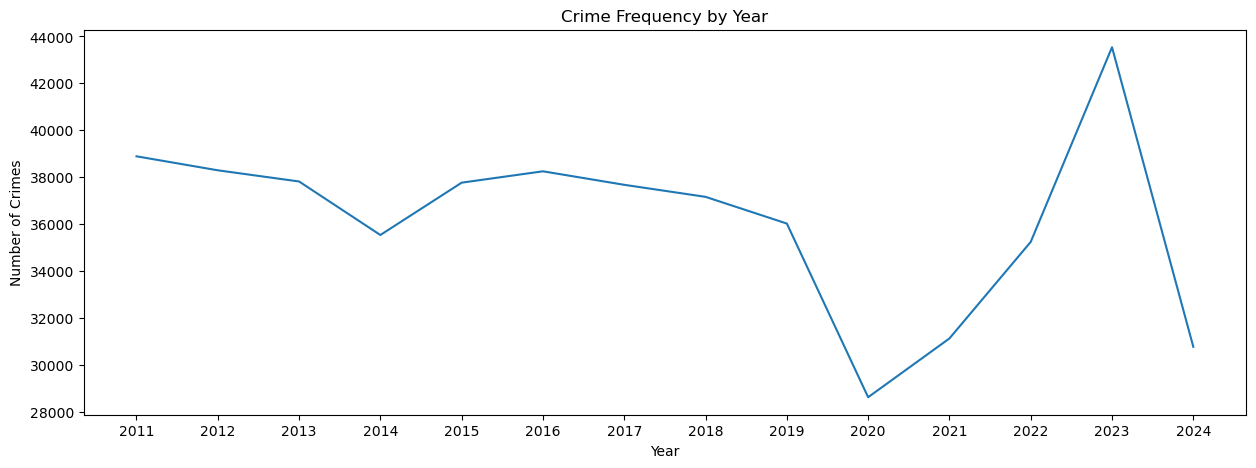

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data for the line plot
year = list(df1.Year.value_counts().index)
no_of_crimes = list(df1.Year.value_counts().values)

# Plotting
plt.figure(figsize=(15, 5))
sns.lineplot(x=year, y=no_of_crimes)  # Specify `x` and `y` explicitly
plt.xticks(year)  # Display each year as a tick
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Crime Frequency by Year')
plt.show()


In [67]:
df1.columns

Index(['CrimeDateTime', 'Description', 'Gender', 'Age', 'Race', 'Old_District',
       'Latitude', 'Longitude', 'violent_crime', 'Year', 'Month', 'Day',
       'time_hour'],
      dtype='object')

C:\Users\Vivek Chatla\AppData\Local\Temp\ipykernel_164\1451971694.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, fontsize=15)


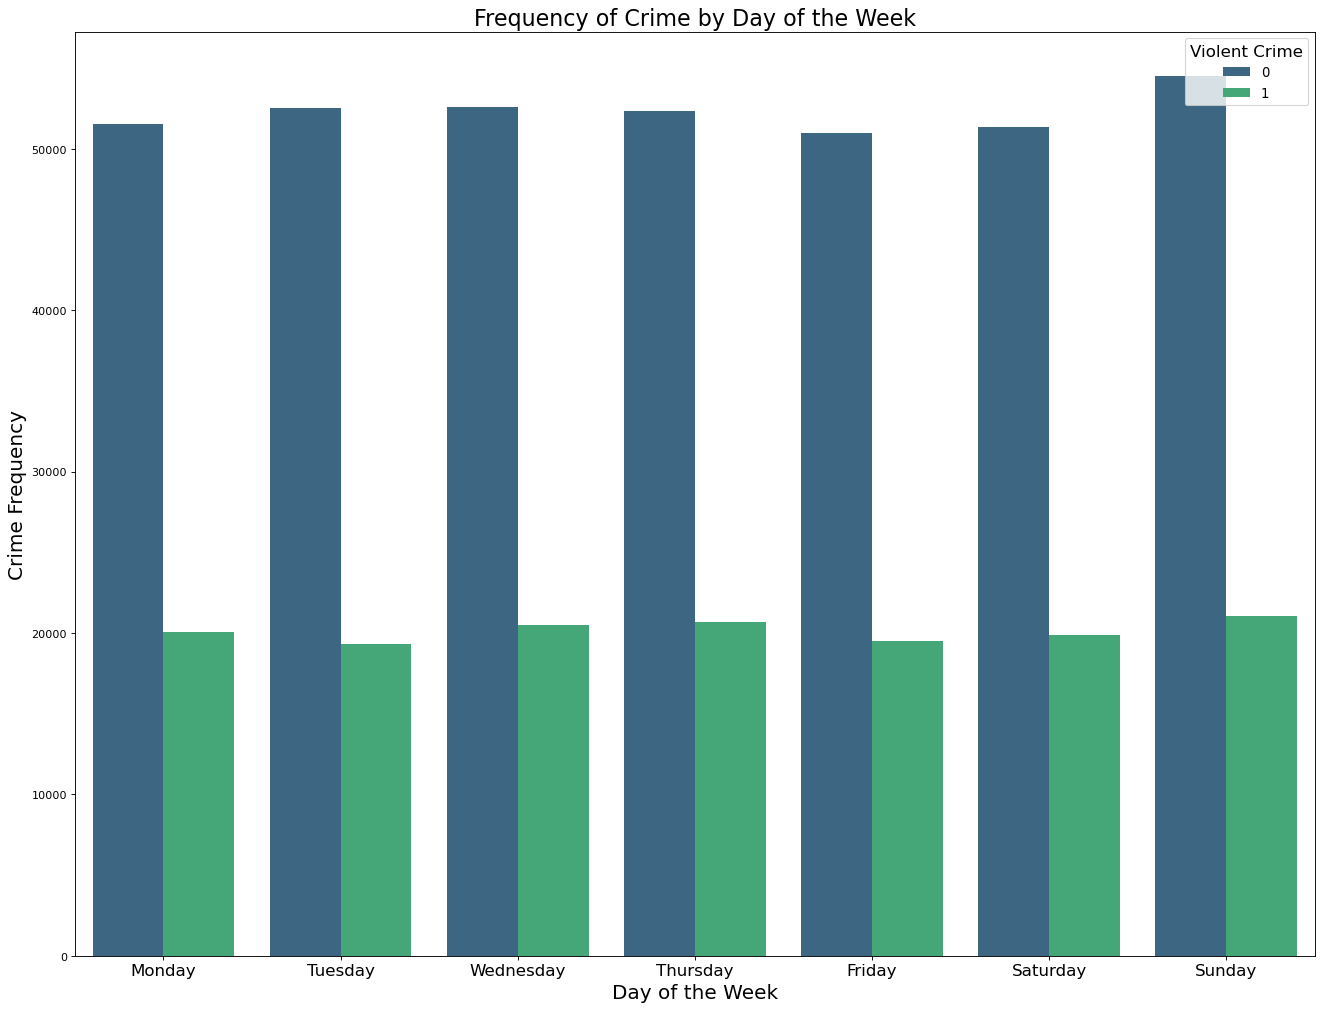

In [68]:
# Extract the day of the week from 'CrimeDateTime' and create a new column
df1['DayOfWeek'] = pd.to_datetime(df1['CrimeDateTime'], errors='coerce').dt.day_name()

# Plotting the frequency of crimes by day of the week
plt.figure(figsize=(20, 15), dpi=80)

# Title and general plot settings
plt.title('Frequency of Crime by Day of the Week', fontsize=20)
ax = sns.countplot(x='DayOfWeek', hue='violent_crime', data=df1, palette='viridis')

# Axes labels and tick customization
plt.ylabel("Crime Frequency", fontsize=18)
plt.xlabel('Day of the Week', fontsize=18)
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.set_xticklabels(labels, fontsize=15)

# Adding legend and adjusting its position
plt.legend(title='Violent Crime', title_fontsize=15, fontsize=12, loc='upper right')

# Displaying the plot
plt.show()


[]

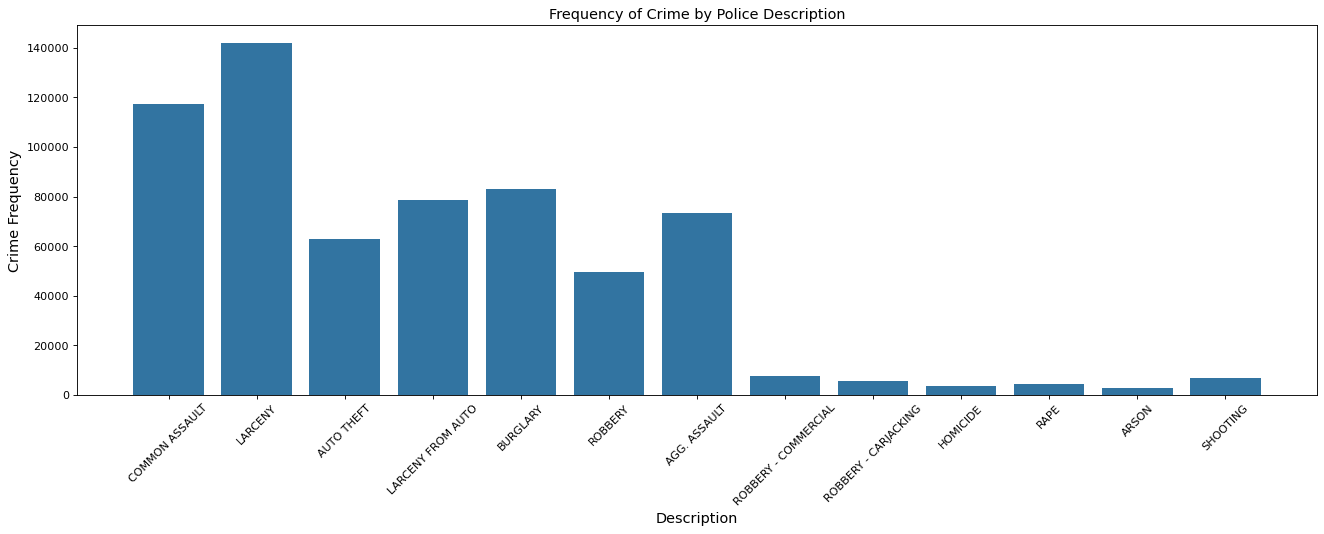

In [69]:
plt.figure(figsize=(20,6), dpi=80)

plt.title('Frequency of Crime by Police Description', fontsize=13)
ax = sns.countplot(x = 'Description', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Description', fontsize=13)
plt.xticks(rotation = 45)
plt.plot()

# Spatial Analysis

In [71]:
import folium
from folium.plugins import HeatMap

In [72]:
def generateBaseMap(default_location = [39.30364, -76.6139599], default_zoom_start = 12):
    base_map = folium.Map(location = default_location, control_scale = True, zoom_start = default_zoom_start)
    return base_map

In [73]:
base_map = generateBaseMap()

In [74]:
df['count'] = 1

In [75]:
df_murder = df[df['Description'] == 'HOMICIDE']

In [76]:
HeatMap(
        data = df_murder[['Latitude', 'Longitude', 'count']].groupby(
            ['Latitude', 'Longitude']).sum().reset_index().values.tolist(),
        radius = 8,
        max_zoom = 13).add_to(base_map)
base_map

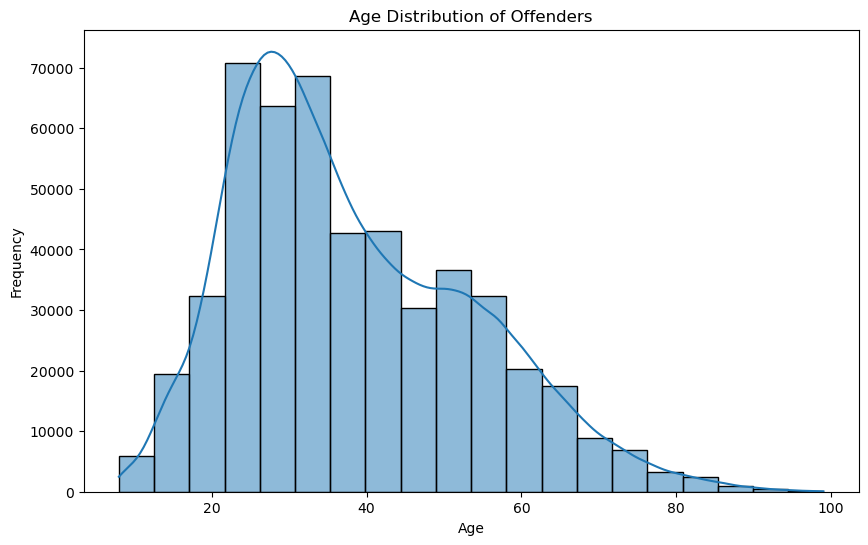

In [77]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='Age', bins=20, kde=True)
plt.title('Age Distribution of Offenders')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Classification models

# Categorical encoding

In [80]:
df1.columns

Index(['CrimeDateTime', 'Description', 'Gender', 'Age', 'Race', 'Old_District',
       'Latitude', 'Longitude', 'violent_crime', 'Year', 'Month', 'Day',
       'time_hour', 'DayOfWeek'],
      dtype='object')

In [81]:
df1.Gender.value_counts()

Gender
F    268199
M    237199
U      1317
Name: count, dtype: int64

As there are only 3 categories in the column 'gender',using get dummies 

In [83]:
encoded_data = pd.get_dummies(df1[['Gender']],drop_first=True)

In [84]:
df1 = pd.concat([df1,encoded_data],axis=1)
df1.head()

,CrimeDateTime,Description,Gender,Age,Race,Old_District,Latitude,Longitude,violent_crime,Year,Month,Day,time_hour,DayOfWeek,Gender_M,Gender_U
0,2015-04-14 15:20:00,COMMON ASSAULT,M,15.0,BLACK_OR_AFRICAN_AMERICAN,NORTHEAST,39.331378,-76.580758,0,2015.0,4.0,14.0,15.0,Tuesday,True,False
1,2015-04-14 15:00:00,LARCENY,F,37.0,BLACK_OR_AFRICAN_AMERICAN,WESTERN,39.318693,-76.654400,0,2015.0,4.0,14.0,15.0,Tuesday,False,False
2,2015-04-14 13:30:00,AUTO THEFT,F,54.0,BLACK_OR_AFRICAN_AMERICAN,NORTHERN,39.355620,-76.609304,0,2015.0,4.0,14.0,13.0,Tuesday,False,False
3,2015-04-14 03:07:00,LARCENY FROM AUTO,F,33.0,BLACK_OR_AFRICAN_AMERICAN,NORTHEAST,39.324435,-76.560800,0,2015.0,4.0,14.0,3.0,Tuesday,False,False
4,2015-04-14 22:10:00,BURGLARY,F,26.0,BLACK_OR_AFRICAN_AMERICAN,EASTERN,39.311000,-76.611729,1,2015.0,4.0,14.0,22.0,Tuesday,False,False


In [85]:
df1.Race.value_counts()

Race
BLACK_OR_AFRICAN_AMERICAN                    329928
WHITE                                        125526
UNKNOWN                                       47408
ASIAN                                          2346
AMERICAN_INDIAN_OR_ALASKA_NATIVE                938
NATIVE_HAWAIIAN_OR_OTHER_PACIFIC_ISLANDER       569
Name: count, dtype: int64

In [86]:
df1.Old_District.value_counts()

Old_District
NORTHEAST    125688
SOUTHEAST     62656
CENTRAL       51097
SOUTHERN      50831
NORTHERN      47119
SOUTHWEST     46287
NORTHWEST     45293
EASTERN       40375
WESTERN       37369
Name: count, dtype: int64

Using label encoder for the columns 'Old_District' and 'Race' as there are more categories

In [88]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [89]:
df1['Old_District_encoded'] = encoder.fit_transform(df1['Old_District'])
df1['Race_encoded'] = encoder.fit_transform(df1['Race'])

In [90]:
df1.head()

,CrimeDateTime,Description,Gender,Age,Race,Old_District,Latitude,Longitude,violent_crime,Year,Month,Day,time_hour,DayOfWeek,Gender_M,Gender_U,Old_District_encoded,Race_encoded
0,2015-04-14 15:20:00,COMMON ASSAULT,M,15.0,BLACK_OR_AFRICAN_AMERICAN,NORTHEAST,39.331378,-76.580758,0,2015.0,4.0,14.0,15.0,Tuesday,True,False,2,2
1,2015-04-14 15:00:00,LARCENY,F,37.0,BLACK_OR_AFRICAN_AMERICAN,WESTERN,39.318693,-76.654400,0,2015.0,4.0,14.0,15.0,Tuesday,False,False,8,2
2,2015-04-14 13:30:00,AUTO THEFT,F,54.0,BLACK_OR_AFRICAN_AMERICAN,NORTHERN,39.355620,-76.609304,0,2015.0,4.0,14.0,13.0,Tuesday,False,False,3,2
3,2015-04-14 03:07:00,LARCENY FROM AUTO,F,33.0,BLACK_OR_AFRICAN_AMERICAN,NORTHEAST,39.324435,-76.560800,0,2015.0,4.0,14.0,3.0,Tuesday,False,False,2,2
4,2015-04-14 22:10:00,BURGLARY,F,26.0,BLACK_OR_AFRICAN_AMERICAN,EASTERN,39.311000,-76.611729,1,2015.0,4.0,14.0,22.0,Tuesday,False,False,1,2


In [91]:
df1.columns

Index(['CrimeDateTime', 'Description', 'Gender', 'Age', 'Race', 'Old_District',
       'Latitude', 'Longitude', 'violent_crime', 'Year', 'Month', 'Day',
       'time_hour', 'DayOfWeek', 'Gender_M', 'Gender_U',
       'Old_District_encoded', 'Race_encoded'],
      dtype='object')

Sorting the data by the date. For doing it sorting the data by hour, day, month, year so that we will get the data in order of date.

In [93]:
df1 = df1.sort_values(by=['time_hour','Day','Month','Year'])

In [94]:
df2 = df1[['Age','Latitude', 'Longitude','Year', 'Month', 'Day', 'time_hour',
       'Gender_M', 'Gender_U', 'Old_District_encoded', 'Race_encoded','violent_crime']]

In [95]:
df2.head()

,Age,Latitude,Longitude,Year,Month,Day,time_hour,Gender_M,Gender_U,Old_District_encoded,Race_encoded,violent_crime
118016,26.0,39.322289,-76.589789,2011.0,1.0,1.0,0.0,False,False,2,2,0
120356,60.0,39.313286,-76.684858,2011.0,1.0,1.0,0.0,True,False,4,5,1
120465,16.0,39.298875,-76.639342,2011.0,1.0,1.0,0.0,True,False,8,2,1
121128,44.0,39.295738,-76.661591,2011.0,1.0,1.0,0.0,True,False,8,2,0
129861,26.0,39.277040,-76.613389,2011.0,1.0,1.0,0.0,False,False,6,5,0


In [96]:
df2 = df2.reset_index(drop = True)
df2.head()

,Age,Latitude,Longitude,Year,Month,Day,time_hour,Gender_M,Gender_U,Old_District_encoded,Race_encoded,violent_crime
0,26.0,39.322289,-76.589789,2011.0,1.0,1.0,0.0,False,False,2,2,0
1,60.0,39.313286,-76.684858,2011.0,1.0,1.0,0.0,True,False,4,5,1
2,16.0,39.298875,-76.639342,2011.0,1.0,1.0,0.0,True,False,8,2,1
3,44.0,39.295738,-76.661591,2011.0,1.0,1.0,0.0,True,False,8,2,0
4,26.0,39.277040,-76.613389,2011.0,1.0,1.0,0.0,False,False,6,5,0


# Spliting the data 

In [98]:
X = df2.drop('violent_crime',axis=1)
y = df2['violent_crime']

As we are considering time columns as predictors, not spliting the data randomly

In [100]:
print("The length of the data frame :",len(df2))
print("Index for 70% of the data = :",len(df2)*0.7)

The length of the data frame : 506715
Index for 70% of the data = : 354700.5


Considering data from index 0 to index 325204 as training data and remaining data as test data

In [102]:
x_train = X.iloc[0:325204]
x_test = X.iloc[325204:]

In [103]:
y_train = y.iloc[0:325204]
y_test = y.iloc[325204:]

# Logistic Regression

In [105]:
#scaling the data 

In [106]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [107]:
x_train_sc = std_scaler.fit_transform(X=x_train)
x_train_sc = pd.DataFrame(x_train_sc,columns = X.columns)
x_train_sc.head()

,Age,Latitude,Longitude,Year,Month,Day,time_hour,Gender_M,Gender_U,Old_District_encoded,Race_encoded
0,-0.787438,0.046788,0.075691,-1.557819,-1.6798,-1.640621,-1.693361,-0.922719,-0.051101,-0.680167,-0.692567
1,1.375442,0.021305,-0.192442,-1.557819,-1.6798,-1.640621,-1.693361,1.083753,-0.051101,0.144905,1.569354
2,-1.423579,-0.019489,-0.064067,-1.557819,-1.6798,-1.640621,-1.693361,1.083753,-0.051101,1.795047,-0.692567
3,0.357616,-0.028371,-0.126819,-1.557819,-1.6798,-1.640621,-1.693361,1.083753,-0.051101,1.795047,-0.692567
4,-0.787438,-0.081300,0.009128,-1.557819,-1.6798,-1.640621,-1.693361,-0.922719,-0.051101,0.969976,1.569354


In [108]:
x_test_sc = std_scaler.fit_transform(X=x_test)
x_test_sc = pd.DataFrame(x_test_sc,columns = X.columns)
x_test_sc.head()

,Age,Latitude,Longitude,Year,Month,Day,time_hour,Gender_M,Gender_U,Old_District_encoded,Race_encoded
0,1.136383,0.023748,-0.125049,1.130329,-1.425865,0.413355,-1.770677,1.034859,-0.050952,1.800570,-0.698941
1,0.207504,-0.041418,-0.160051,1.130329,-1.425865,0.413355,-1.770677,-0.966316,-0.050952,1.800570,-0.698941
2,1.202732,-0.000291,-0.092922,1.130329,-1.425865,0.413355,-1.770677,1.034859,-0.050952,1.800570,-0.698941
3,-0.057890,-0.227288,-0.035763,1.377317,-1.425865,0.413355,-1.770677,-0.966316,-0.050952,0.965951,-0.698941
4,-1.849300,-0.227288,-0.035763,1.377317,-1.425865,0.413355,-1.770677,1.034859,-0.050952,0.965951,-0.698941


In [109]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [110]:
model = lr.fit(x_train_sc,y_train)
y_pred_lr = model.predict(x_test_sc)

In [111]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score

In [112]:
lr_acc = accuracy_score(y_test,y_pred_lr)
lr_pre = precision_score(y_test,y_pred_lr)
lr_rec = recall_score(y_test,y_pred_lr)
lr_f1  = f1_score(y_test,y_pred_lr)
lr_roc = roc_auc_score(y_test,y_pred_lr)
print("Accuracy score of Logistic Regression is: ",lr_acc)
print("Precision score of Logistic Regression is: ",lr_pre)
print("Recall score of Logistic Regression is: ",lr_rec)
print("F1 score of Logistic Regression is: ",lr_f1)
print("roc auc score of Logistic Regression is: ",lr_roc)

Accuracy score of Logistic Regression is:  0.7531113816793472
Precision score of Logistic Regression is:  1.0
Recall score of Logistic Regression is:  2.2314455304146026e-05
F1 score of Logistic Regression is:  4.462791476068281e-05
roc auc score of Logistic Regression is:  0.5000111572276521


In [113]:
A = []
P = []
R = []
F = []
Ro = []
M = []
A.append(lr_acc)
P.append(lr_pre)
R.append(lr_rec)
F.append(lr_f1)
Ro.append(lr_roc)
M.append('Logistic Regression')

# KNN

In [115]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [116]:
model = knn.fit(x_train_sc,y_train)
y_pred_knn = model.predict(x_test_sc)

In [117]:
knn_acc = accuracy_score(y_test,y_pred_knn)
knn_pre = precision_score(y_test,y_pred_knn)
knn_rec = recall_score(y_test,y_pred_knn)
knn_f1  = f1_score(y_test,y_pred_knn)
knn_roc = roc_auc_score(y_test,y_pred_knn)
print("Accuracy score of KNN is: ",knn_acc)
print("Precision score of KNN is: ",knn_pre)
print("Recall score of KNN is: ",knn_rec)
print("F1 score of KNN is: ",knn_f1)
print("roc auc score of KNN is: ",knn_roc)

Accuracy score of KNN is:  0.6740417936103046
Precision score of KNN is:  0.2826462302729228
Recall score of KNN is:  0.20821618244298656
F1 score of KNN is:  0.23978824829429377
roc auc score of KNN is:  0.51748585371811


In [118]:
A.append(knn_acc)
P.append(knn_pre)
R.append(knn_rec)
F.append(knn_f1)
Ro.append(knn_roc)
M.append('KNN')

# Decision Tree

In [120]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [121]:
model = dtc.fit(x_train,y_train)
y_pred_dtc = model.predict(x_test)

In [122]:
dtc_acc = accuracy_score(y_test,y_pred_dtc)
dtc_pre = precision_score(y_test,y_pred_dtc)
dtc_rec = recall_score(y_test,y_pred_dtc)
dtc_f1  = f1_score(y_test,y_pred_dtc)
dtc_roc = roc_auc_score(y_test,y_pred_dtc)
print("Accuracy score of Decision Tree Classifier is: ",dtc_acc)
print("Precision score of Decision Tree Classifier is: ",dtc_pre)
print("Recall score of Decision Tree Classifier is: ",dtc_rec)
print("F1 score of Decision Tree Classifier is: ",dtc_f1)
print("roc auc score of Decision Tree Classifier is: ",dtc_roc)

Accuracy score of Decision Tree Classifier is:  0.6330745795020687
Precision score of Decision Tree Classifier is:  0.29164355526653024
Recall score of Decision Tree Classifier is:  0.3402508144776186
F1 score of Decision Tree Classifier is:  0.31407767490241717
roc auc score of Decision Tree Classifier is:  0.5346615711634016


In [123]:
A.append(dtc_acc)
P.append(dtc_pre)
R.append(dtc_rec)
F.append(dtc_f1)
Ro.append(dtc_roc)
M.append('Decision Tree')

# Random Forest 

In [125]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [126]:
model = rfc.fit(x_train,y_train)
y_pred_rfc = model.predict(x_test)

In [127]:
rfc_acc = accuracy_score(y_test,y_pred_rfc)
rfc_pre = precision_score(y_test,y_pred_rfc)
rfc_rec = recall_score(y_test,y_pred_rfc)
rfc_f1  = f1_score(y_test,y_pred_rfc)
rfc_roc = roc_auc_score(y_test,y_pred_rfc)
print("Accuracy score of Random Forest Classifier is: ",rfc_acc)
print("Precision score of Random Forest Classifier is: ",rfc_pre)
print("Recall score of Random Forest Classifier is: ",rfc_rec)
print("F1 score of Random Forest Classifier is: ",rfc_f1)
print("roc auc score of Random Forest Classifier is: ",rfc_roc)

Accuracy score of Random Forest Classifier is:  0.7496239897306499
Precision score of Random Forest Classifier is:  0.4656521739130435
Recall score of Random Forest Classifier is:  0.09559512652296158
F1 score of Random Forest Classifier is:  0.15862554152627098
roc auc score of Random Forest Classifier is:  0.5298161883959022


In [128]:
A.append(rfc_acc)
P.append(rfc_pre)
R.append(rfc_rec)
F.append(rfc_f1)
Ro.append(rfc_roc)
M.append('Random Forest Classifier')

# Ada boost

In [130]:
from sklearn.ensemble import AdaBoostClassifier
adc = AdaBoostClassifier()

In [131]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost classifier with the 'SAMME' algorithm
adc = AdaBoostClassifier(algorithm='SAMME')

# Fit the model
model = adc.fit(x_train, y_train)

# Predict using the trained model
y_pred_adc = model.predict(x_test)


In [132]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate metrics
adc_acc = accuracy_score(y_test, y_pred_adc)
adc_pre = precision_score(y_test, y_pred_adc)
adc_rec = recall_score(y_test, y_pred_adc)
adc_f1 = f1_score(y_test, y_pred_adc)
adc_roc = roc_auc_score(y_test, y_pred_adc)

# Print results
print("Accuracy score of AdaBoost Classifier is: ", adc_acc)
print("Precision score of AdaBoost Classifier is: ", adc_pre)
print("Recall score of AdaBoost Classifier is: ", adc_rec)
print("F1 score of AdaBoost Classifier is: ", adc_f1)
print("ROC AUC score of AdaBoost Classifier is: ", adc_roc)


D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy score of AdaBoost Classifier is:  0.7531058723713714
Precision score of AdaBoost Classifier is:  0.0
Recall score of AdaBoost Classifier is:  0.0
F1 score of AdaBoost Classifier is:  0.0
ROC AUC score of AdaBoost Classifier is:  0.5


In [133]:
A.append(adc_acc)
P.append(adc_pre)
R.append(adc_rec)
F.append(adc_f1)
Ro.append(adc_roc)
M.append('Ada boost')

# Gradient boosting

In [135]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [136]:
model = gbc.fit(x_train,y_train)
y_pred_gbc = model.predict(x_test)

In [137]:
gbc_acc = accuracy_score(y_test,y_pred_gbc)
gbc_pre = precision_score(y_test,y_pred_gbc)
gbc_rec = recall_score(y_test,y_pred_gbc)
gbc_f1  = f1_score(y_test,y_pred_gbc)
gbc_roc = roc_auc_score(y_test,y_pred_gbc)
print("Accuracy score of AdaBoost Classifier is: ",gbc_acc)
print("Precision score of AdaBoost Classifier is: ",gbc_pre)
print("Recall score of AdaBoost Classifier is: ",gbc_rec)
print("F1 score of AdaBoost Classifier is: ",gbc_f1)
print("roc auc score of AdaBoost Classifier is: ",gbc_roc)

Accuracy score of AdaBoost Classifier is:  0.7531389282192263
Precision score of AdaBoost Classifier is:  0.8
Recall score of AdaBoost Classifier is:  0.0001785156424331682
F1 score of AdaBoost Classifier is:  0.0003569516330537212
roc auc score of AdaBoost Classifier is:  0.5000819423717188


In [138]:
A.append(gbc_acc)
P.append(gbc_pre)
R.append(gbc_rec)
F.append(gbc_f1)
Ro.append(gbc_roc)
M.append('Gradient Boosting')

# Xgboost

In [140]:
from xgboost import XGBClassifier
xgbc=XGBClassifier()

In [141]:
model = xgbc.fit(x_train,y_train)
y_pred_xgb = model.predict(x_test)

In [142]:
xgbc_acc = accuracy_score(y_test,y_pred_xgb)
xgbc_pre = precision_score(y_test,y_pred_xgb)
xgbc_rec = recall_score(y_test,y_pred_xgb)
xgbc_f1  = f1_score(y_test,y_pred_xgb)
xgbc_roc = roc_auc_score(y_test,y_pred_xgb)
print("Accuracy score of Xgbc Classifier is: ",xgbc_acc)
print("Precision score of Xgbc Classifier is: ",xgbc_pre)
print("Recall score of Xgbc Classifier is: ",xgbc_rec)
print("F1 score of Xgbc Classifier is: ",xgbc_f1)
print("roc auc score of X Classifier is: ",xgbc_roc)

Accuracy score of Xgbc Classifier is:  0.7547807019960223
Precision score of Xgbc Classifier is:  0.5202666666666667
Recall score of Xgbc Classifier is:  0.08707100459677779
F1 score of Xgbc Classifier is:  0.14917612876094352
roc auc score of X Classifier is:  0.5303750086518567


In [143]:
A.append(xgbc_acc)
P.append(xgbc_pre)
R.append(xgbc_rec)
F.append(xgbc_f1)
Ro.append(xgbc_roc)
M.append('Xgboost')

In [144]:
scores_df = pd.DataFrame({'Model_name':M,'Accuracy_Score':A,'Precision_Score':P,'Recall_Score':R,'F1 Score':F,'ROC AUC Score':Ro})
scores_df.sort_values(by=['Accuracy_Score','Recall_Score','Precision_Score'],ascending=False)

,Model_name,Accuracy_Score,Precision_Score,Recall_Score,F1 Score,ROC AUC Score
6,Xgboost,0.754781,0.520267,0.087071,0.149176,0.530375
5,Gradient Boosting,0.753139,0.800000,0.000179,0.000357,0.500082
0,Logistic Regression,0.753111,1.000000,0.000022,0.000045,0.500011
4,Ada boost,0.753106,0.000000,0.000000,0.000000,0.500000
3,Random Forest Classifier,0.749624,0.465652,0.095595,0.158626,0.529816
1,KNN,0.674042,0.282646,0.208216,0.239788,0.517486
2,Decision Tree,0.633075,0.291644,0.340251,0.314078,0.534662


The Xgboost model achieved the highest accuracy and a balanced ROC AUC score, making it the most effective among the tested models for predicting violent crime occurrences in Baltimore. This analysis aids in providing law enforcement with a more robust tool to forecast and potentially prevent future crimes.

# Confusion Matrix of Xgboost

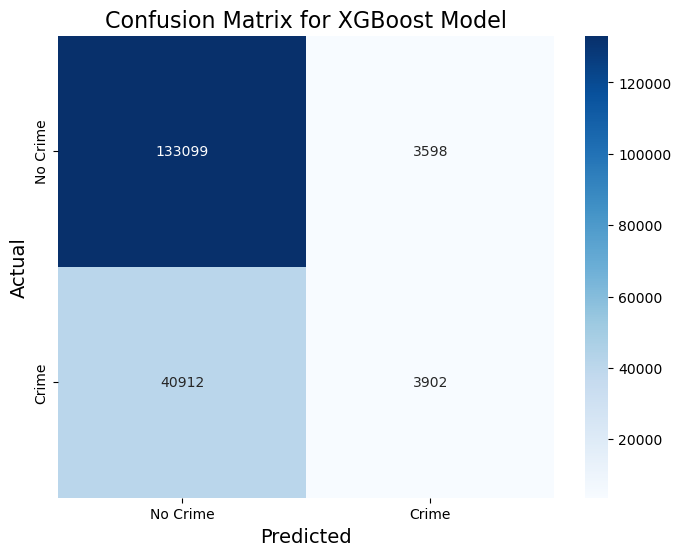

In [146]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Crime', 'Crime'], yticklabels=['No Crime', 'Crime'])

# Add labels and title
plt.title('Confusion Matrix for XGBoost Model', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)

# Show the plot
plt.show()


# Smote Analysis

In [147]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, auc
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE  # For oversampling the minority class
from imblearn.pipeline import Pipeline as imPipeline
from sklearn.utils.class_weight import compute_class_weight

# Check class distribution
print(f"Class distribution in y_train: {y_train.value_counts()}")

# Step 2: Handling Class Imbalance (Resampling using SMOTE)
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Check class distribution after resampling
print(f"Class distribution in y_train after SMOTE: {y_train_resampled.value_counts()}")

# Step 3: Hyperparameter Tuning with GridSearchCV (use Stratified K-Fold for balanced splits)
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [100, 200],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 1.0],
    'scale_pos_weight': [1, 2, 3],  # Adding weight to the minority class
}

# Set up a Stratified K-Fold cross-validation for better handling of imbalanced data
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Set up the XGBoost classifier
xgbc = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgbc, param_grid=param_grid, scoring='accuracy', cv=skf, verbose=1, n_jobs=-1)
grid_search.fit(x_train_resampled, y_train_resampled)

# Step 4: Best Model Selection
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Accuracy Score (CV):", grid_search.best_score_)

# Step 5: Evaluate Model on Test Data
# Predict on the test set using the best model
y_pred = best_model.predict(x_test)

# Step 6: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Tuned Accuracy: {accuracy}")
print(f"Tuned Precision: {precision}")
print(f"Tuned Recall: {recall}")
print(f"Tuned F1 Score: {f1}")
print(f"Tuned ROC AUC: {roc_auc}")

# Step 7: Adjusting Decision Threshold (if necessary)
y_prob = best_model.predict_proba(x_test)[:, 1]  # Get probability for the positive class
threshold = 0.3  # Lower threshold for classifying positive
y_pred_threshold = (y_prob >= threshold).astype(int)

# Re-evaluate after threshold adjustment
precision_threshold = precision_score(y_test, y_pred_threshold)
recall_threshold = recall_score(y_test, y_pred_threshold)
f1_threshold = f1_score(y_test, y_pred_threshold)
roc_auc_threshold = roc_auc_score(y_test, y_pred_threshold)

print(f"Adjusted Precision: {precision_threshold}")
print(f"Adjusted Recall: {recall_threshold}")
print(f"Adjusted F1 Score: {f1_threshold}")
print(f"Adjusted ROC AUC: {roc_auc_threshold}")

# Step 8: Precision-Recall Curve and AUC (for imbalanced datasets)
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_curve, precision_curve)
print(f"Precision-Recall AUC: {pr_auc}")


Class distribution in y_train: violent_crime
0    229096
1     96108
Name: count, dtype: int64
Class distribution in y_train after SMOTE: violent_crime
0    229096
1    229096
Name: count, dtype: int64
Fitting 3 folds for each of 1296 candidates, totalling 3888 fits


C:\Users\Vivek Chatla\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [21:17:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 200, 'scale_pos_weight': 1, 'subsample': 1.0}
Best Accuracy Score (CV): 0.7833768375983529
Tuned Accuracy: 0.7471998942212869
Tuned Precision: 0.46650418697662793
Tuned Recall: 0.16657740884545008
Tuned F1 Score: 0.245494606682452
Tuned ROC AUC: 0.5520627082413897
Adjusted Precision: 0.3373124330117899
Adjusted Recall: 0.5618110411924845
Adjusted F1 Score: 0.4215346493210776
Adjusted ROC AUC: 0.5999834813415402
Precision-Recall AUC: 0.37381277483129616


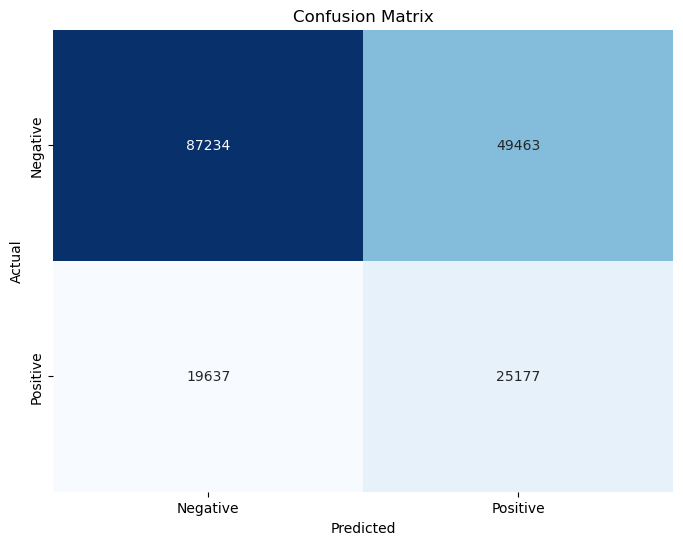

In [148]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_threshold)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Precision-Recall AUC: 0.37381277483129616


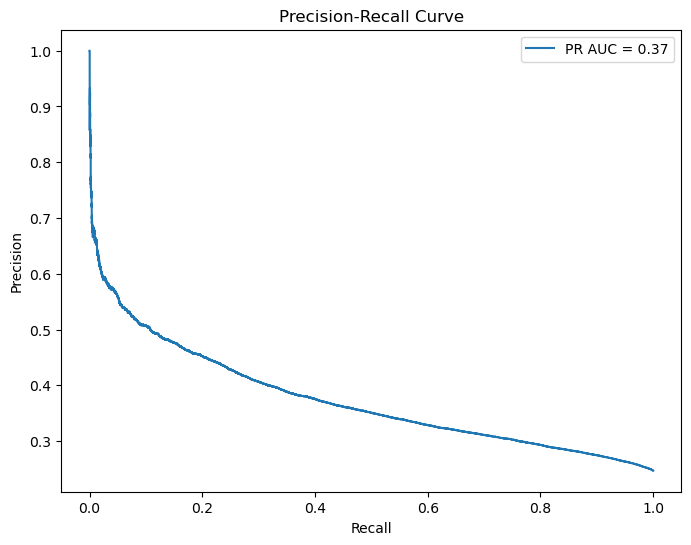

Threshold: 0.1 | Precision: 0.258 | Recall: 0.972 | F1 Score: 0.408
Threshold: 0.2 | Precision: 0.288 | Recall: 0.826 | F1 Score: 0.427
Threshold: 0.3 | Precision: 0.337 | Recall: 0.562 | F1 Score: 0.422
Threshold: 0.4 | Precision: 0.397 | Recall: 0.328 | F1 Score: 0.359
Threshold: 0.5 | Precision: 0.467 | Recall: 0.167 | F1 Score: 0.245


In [149]:
import matplotlib.pyplot as plt

# Get predicted probabilities
y_prob = best_model.predict_proba(x_test)[:, 1]

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

print(f"Precision-Recall AUC: {pr_auc}")

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

# Evaluate metrics at different thresholds
for thresh in np.arange(0.1, 0.6, 0.1):  # Loop through thresholds from 0.1 to 0.5
    y_pred_thresh = (y_prob >= thresh).astype(int)
    precision_thresh = precision_score(y_test, y_pred_thresh)
    recall_thresh = recall_score(y_test, y_pred_thresh)
    f1_thresh = f1_score(y_test, y_pred_thresh)
    print(f"Threshold: {thresh:.1f} | Precision: {precision_thresh:.3f} | Recall: {recall_thresh:.3f} | F1 Score: {f1_thresh:.3f}")


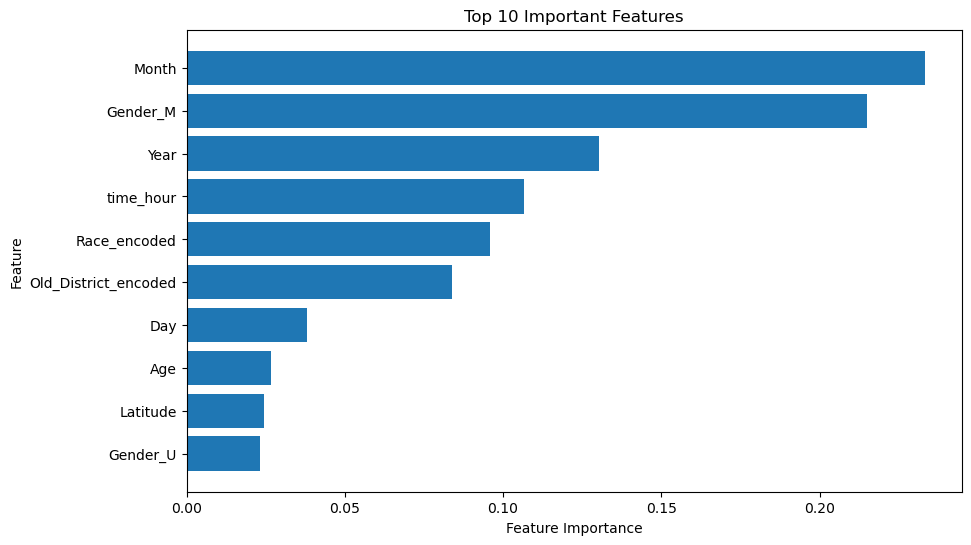

                 Feature  Importance
4                  Month    0.233146
7               Gender_M    0.214966
3                   Year    0.130176
6              time_hour    0.106504
10          Race_encoded    0.095932
9   Old_District_encoded    0.083907
5                    Day    0.038012
0                    Age    0.026828
1               Latitude    0.024454
8               Gender_U    0.023206
2              Longitude    0.022869


In [150]:
importances = best_model.feature_importances_
feature_names = x_train.columns

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Important Features')
plt.gca().invert_yaxis()
plt.show()

# Print the sorted feature importances
print(importance_df)


In [153]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve
from scipy.stats import uniform
from imblearn.over_sampling import SMOTE
import numpy as np

# Assuming your data is already loaded
# x_train, y_train = your_data

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Set up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'learning_rate': uniform(0.01, 0.5),
    'max_depth': [3, 5, 7, 9, 10],
    'min_child_weight': [1, 3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'scale_pos_weight': [1, 2, 3],  # Adjust this for class imbalance
    'gamma': uniform(0, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1),
    'max_delta_step': [0, 1, 2],
    'tree_method': ['auto', 'hist']
}

# Define the XGBoost model
model = xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=100,  # You can increase this number for more exhaustive search
    scoring='accuracy',
    cv=skf,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit the model
random_search.fit(x_train_resampled, y_train_resampled)

# Best parameters and best model
print("Best Parameters from RandomizedSearchCV:", random_search.best_params_)

# Make predictions using the best model from RandomizedSearchCV
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_train_resampled)

# Evaluate the tuned model
accuracy = accuracy_score(y_train_resampled, y_pred)
precision = precision_score(y_train_resampled, y_pred)
recall = recall_score(y_train_resampled, y_pred)
f1 = f1_score(y_train_resampled, y_pred)
roc_auc = roc_auc_score(y_train_resampled, y_pred)

# Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_train_resampled, y_pred)

# Print the metrics
print(f"Tuned Accuracy: {accuracy:.4f}")
print(f"Tuned Precision: {precision:.4f}")
print(f"Tuned Recall: {recall:.4f}")
print(f"Tuned F1 Score: {f1:.4f}")
print(f"Tuned ROC AUC: {roc_auc:.4f}")

# Adjusted metrics (optional: use threshold tuning or balanced accuracy)
threshold = 0.5  # Default threshold, you can experiment with this
y_pred_adjusted = (best_model.predict_proba(x_train_resampled)[:, 1] > threshold).astype(int)

adjusted_accuracy = accuracy_score(y_train_resampled, y_pred_adjusted)
adjusted_precision = precision_score(y_train_resampled, y_pred_adjusted)
adjusted_recall = recall_score(y_train_resampled, y_pred_adjusted)
adjusted_f1 = f1_score(y_train_resampled, y_pred_adjusted)
adjusted_roc_auc = roc_auc_score(y_train_resampled, y_pred_adjusted)

print(f"Adjusted Accuracy: {adjusted_accuracy:.4f}")
print(f"Adjusted Precision: {adjusted_precision:.4f}")
print(f"Adjusted Recall: {adjusted_recall:.4f}")
print(f"Adjusted F1 Score: {adjusted_f1:.4f}")
print(f"Adjusted ROC AUC: {adjusted_roc_auc:.4f}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Vivek Chatla\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [22:22:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters from RandomizedSearchCV: {'colsample_bytree': 0.9870402655379369, 'gamma': 0.33838495221215165, 'learning_rate': 0.25126047482132124, 'max_delta_step': 1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 300, 'reg_alpha': 0.602440925901119, 'reg_lambda': 0.5537030523458008, 'scale_pos_weight': 1, 'subsample': 0.925712358831304, 'tree_method': 'auto'}
Tuned Accuracy: 0.8937
Tuned Precision: 0.9702
Tuned Recall: 0.8124
Tuned F1 Score: 0.8843
Tuned ROC AUC: 0.8937
Adjusted Accuracy: 0.8937
Adjusted Precision: 0.9702
Adjusted Recall: 0.8124
Adjusted F1 Score: 0.8843
Adjusted ROC AUC: 0.8937


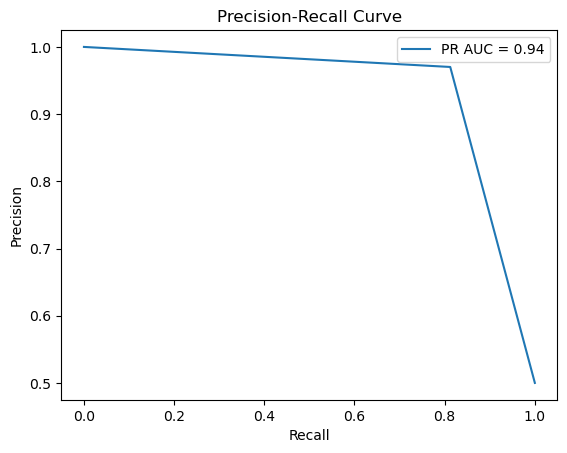

In [155]:
from sklearn.metrics import auc, precision_recall_curve

# Compute precision-recall values
precision_vals, recall_vals, _ = precision_recall_curve(y_train_resampled, y_pred)

# Calculate PR AUC
pr_auc = auc(recall_vals, precision_vals)

# Plot Precision-Recall Curve
import matplotlib.pyplot as plt

plt.plot(recall_vals, precision_vals, label=f"PR AUC = {pr_auc:.2f}")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


# Confusion Matrix of Tuned Xgboost Model

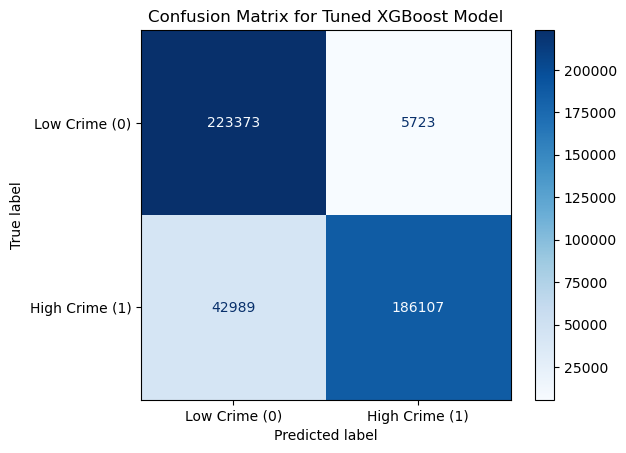

In [159]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predictions on the training data (adjust for test data accordingly)
y_pred_binary = (best_model.predict_proba(x_train_resampled)[:, 1] > 0.5).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_train_resampled, y_pred_binary)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low Crime (0)', 'High Crime (1)'])
disp.plot(cmap=plt.cm.Blues)

# Add a title
plt.title("Confusion Matrix for Tuned XGBoost Model")
plt.show()


# Predicted OutComes

In [169]:
import pandas as pd

# Ensure 'df2' contains the same features as the training data
# Drop any columns not used during training
if 'violent_crime' in df2.columns:
    df2 = df2.drop(columns=['violent_crime'])  # Drop the target column if present

# Generate binary predictions (0 for Low Crime, 1 for High Crime)
predictions = best_model.predict(df2)

# Generate probabilities for the positive class (High Crime)
probabilities = best_model.predict_proba(df2)[:, 1]  # Probability for class '1'

# Convert predictions to a DataFrame for better readability (optional)
results_df = pd.DataFrame({
    'Prediction': predictions,
    'Probability_High_Crime': probabilities
})

# Display results
print(results_df.head())  # Display first few rows of predictions and probabilities

# Save predictions to a CSV file (optional)
results_df.to_csv('predictions.csv', index=False)


   Prediction  Probability_High_Crime
0           0                0.102423
1           1                0.785988
2           1                0.875318
3           0                0.170587
4           0                0.087904


C:\Users\Vivek Chatla\AppData\Local\Temp\ipykernel_164\4173051928.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Prediction', data=df2, palette='viridis')


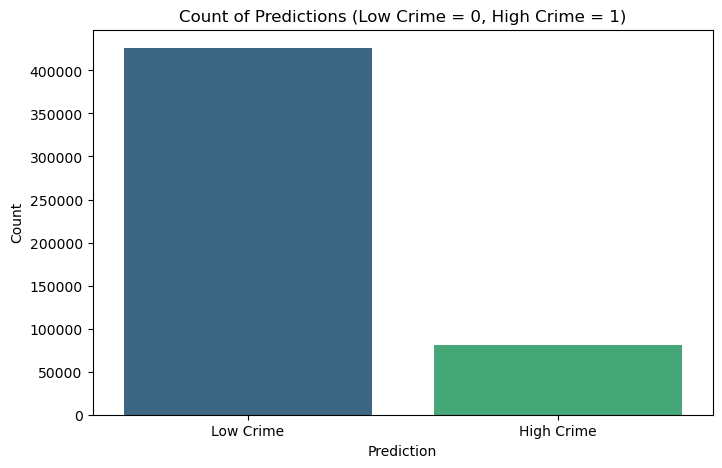

In [177]:
# 1. **Bar Plot** - Count of Predicted Classes (Low vs. High Crime)
plt.figure(figsize=(8, 5))
sns.countplot(x='Prediction', data=df2, palette='viridis')
plt.title('Count of Predictions (Low Crime = 0, High Crime = 1)')
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.xticks([0, 1], labels=['Low Crime', 'High Crime'])
plt.show()


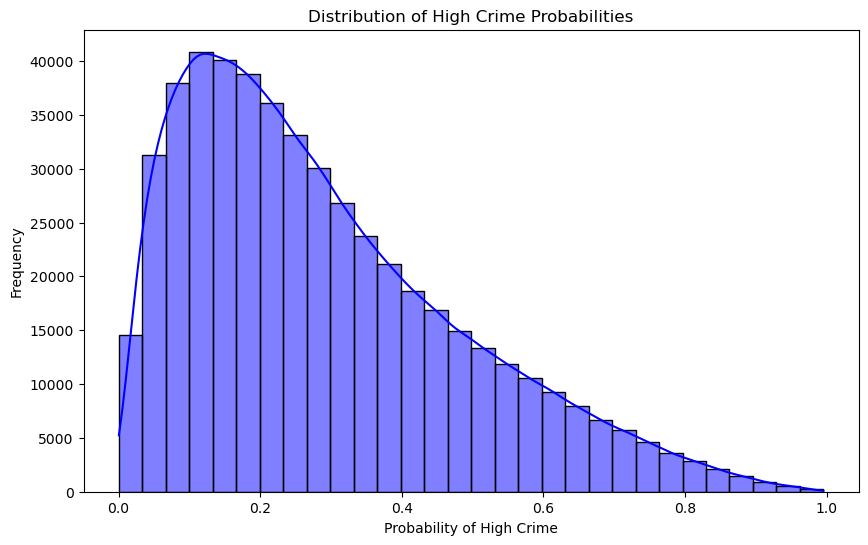

In [179]:
# 2. **Histogram** - Distribution of Probabilities
plt.figure(figsize=(10, 6))
sns.histplot(df2['Probability_High_Crime'], kde=True, color='blue', bins=30)
plt.title('Distribution of High Crime Probabilities')
plt.xlabel('Probability of High Crime')
plt.ylabel('Frequency')
plt.show()

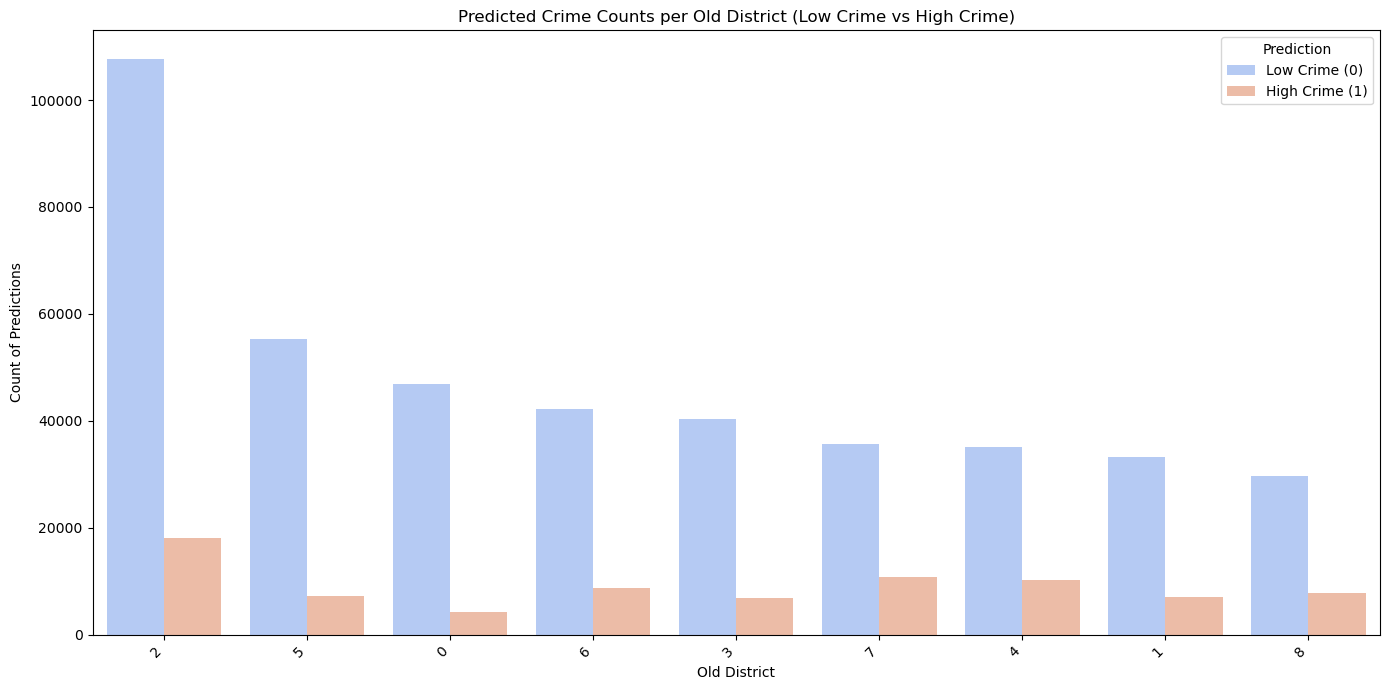

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. **Count Plot** - Predicted Crime Counts per Old District
plt.figure(figsize=(14, 7))
sns.countplot(x='Old_District_encoded', hue='Prediction', data=df2, palette='coolwarm', order=df2['Old_District_encoded'].value_counts().index)
plt.title('Predicted Crime Counts per Old District (Low Crime vs High Crime)')
plt.xlabel('Old District')
plt.ylabel('Count of Predictions')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Prediction', labels=['Low Crime (0)', 'High Crime (1)'])
plt.tight_layout()
plt.show()

**The above visualization contains Old District values as numericals, as categorical values are encoded into numerical values. Below is description of what numerical values implies to:**

**0-NORTHEAST    
1-SOUTHEAST     
2-CENTRAL      
3-SOUTHERN    
4-NORTHERN     
5-SOUTHWEST  
6-NORTHWEST     
7-EASTERN     
8-WESTERN**

C:\Users\Vivek Chatla\AppData\Local\Temp\ipykernel_164\1773356331.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Old_District_encoded', y='Probability_High_Crime', data=df2, palette='coolwarm', order=df2['Old_District_encoded'].value_counts().index)


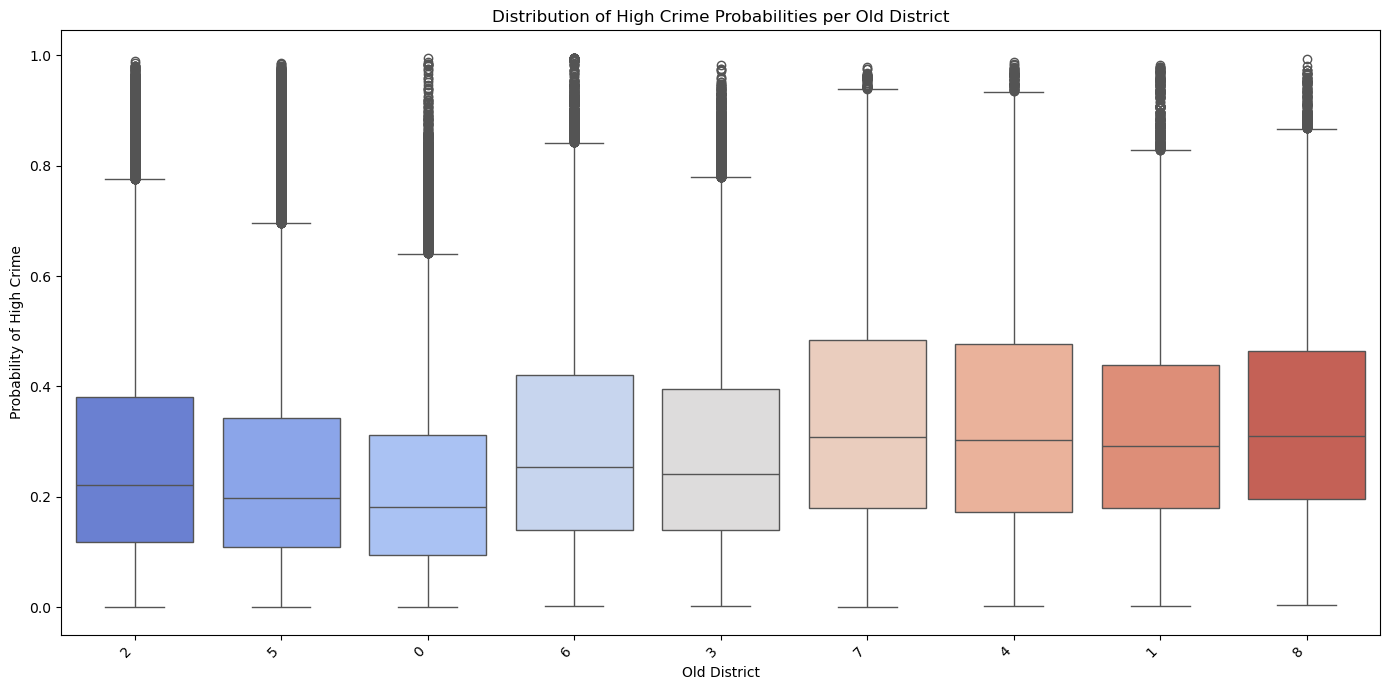

In [181]:
# 2. **Probability Box Plot** - Probabilities of High Crime per Old District
plt.figure(figsize=(14, 7))
sns.boxplot(x='Old_District_encoded', y='Probability_High_Crime', data=df2, palette='coolwarm', order=df2['Old_District_encoded'].value_counts().index)
plt.title('Distribution of High Crime Probabilities per Old District')
plt.xlabel('Old District')
plt.ylabel('Probability of High Crime')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**The above visualization contains Old District values as numericals, as categorical values are encoded into numerical values. Below is description of what numerical values implies to:**

**0-NORTHEAST
1-SOUTHEAST
2-CENTRAL
3-SOUTHERN
4-NORTHERN
5-SOUTHWEST
6-NORTHWEST
7-EASTERN
8-WESTERN**

C:\Users\Vivek Chatla\AppData\Local\Temp\ipykernel_164\1233266369.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Old_District_encoded', y='Probability_High_Crime', data=avg_prob, palette='coolwarm', order=avg_prob.sort_values('Probability_High_Crime', ascending=False).Old_District_encoded)


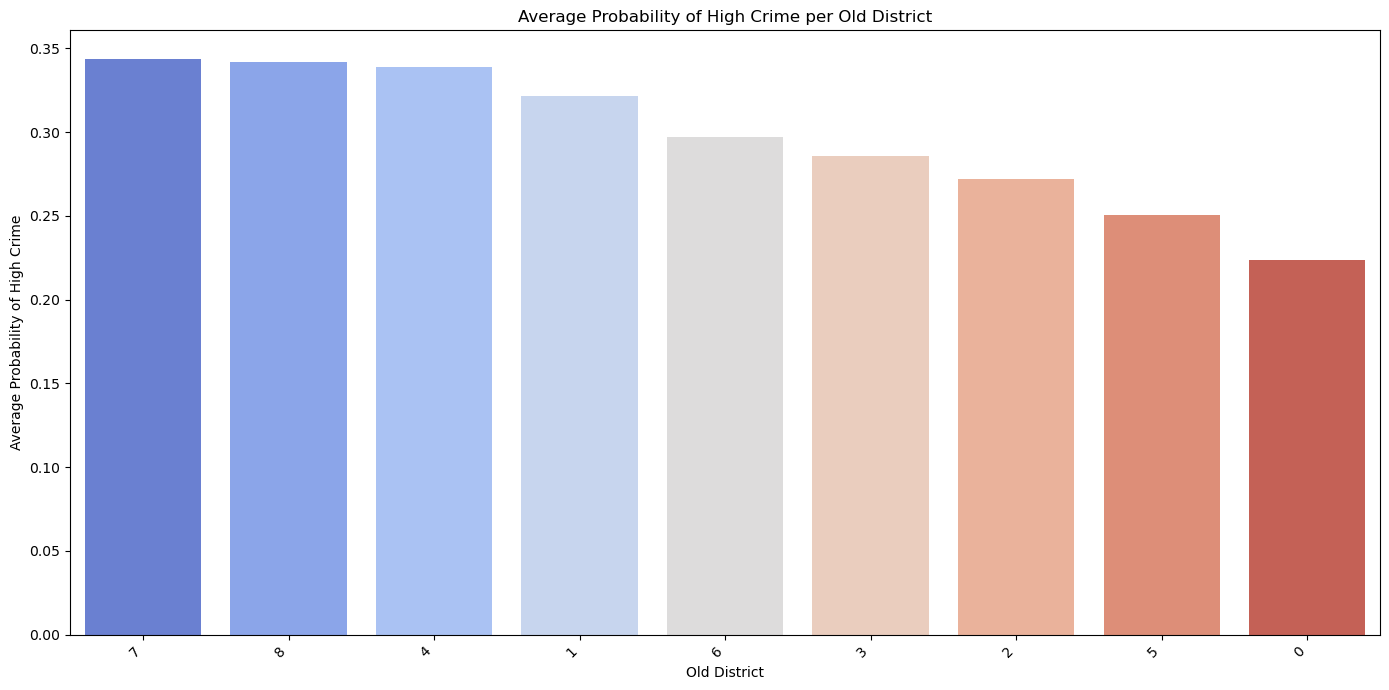

In [183]:
# 3. **Bar Plot** - Average Probability of High Crime per Old District
plt.figure(figsize=(14, 7))
avg_prob = df2.groupby('Old_District_encoded')['Probability_High_Crime'].mean().reset_index()
sns.barplot(x='Old_District_encoded', y='Probability_High_Crime', data=avg_prob, palette='coolwarm', order=avg_prob.sort_values('Probability_High_Crime', ascending=False).Old_District_encoded)
plt.title('Average Probability of High Crime per Old District')
plt.xlabel('Old District')
plt.ylabel('Average Probability of High Crime')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**The above visualization contains Old District values as numericals, as categorical values are encoded into numerical values. Below is description of what numerical values implies to:**

**0-NORTHEAST
1-SOUTHEAST 
2-CENTRAL
3-SOUTHERN
4-NORTHERN
5-SOUTHWEST
6-NORTHWEST 
7-EASTERN 
8-WESTERN**

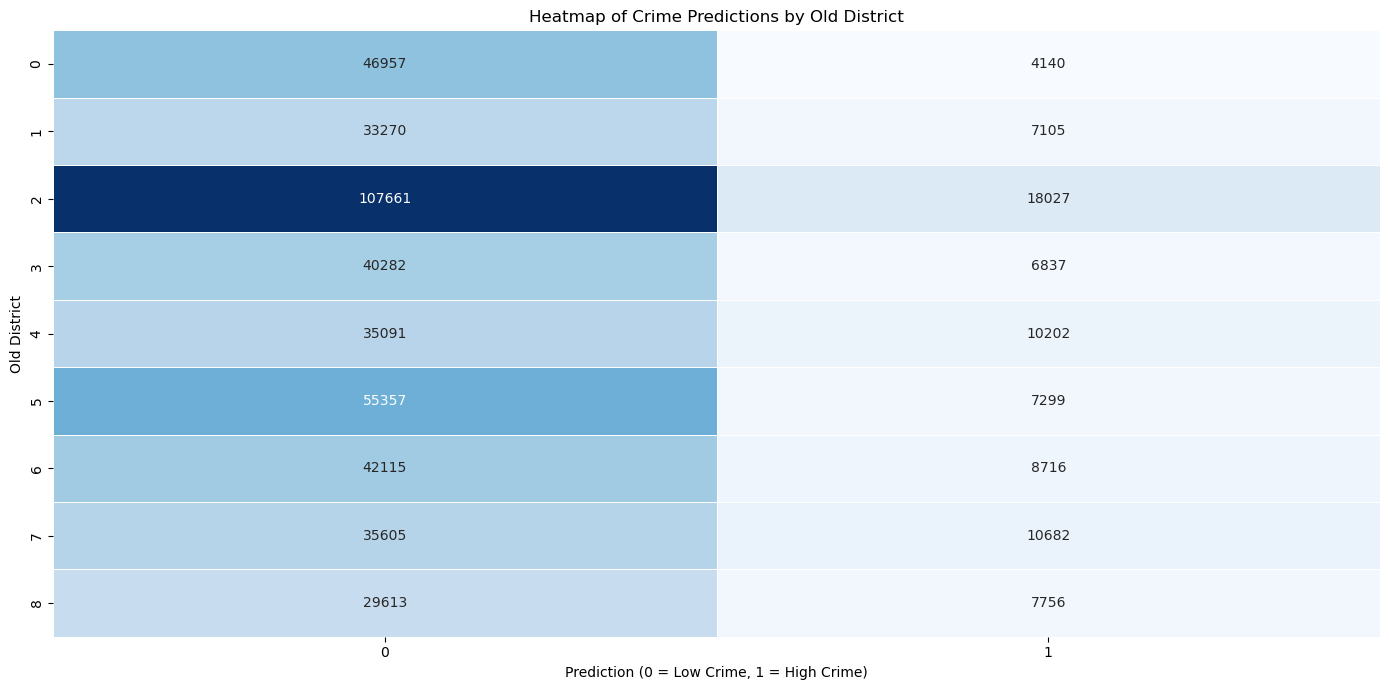

In [185]:
# 4. **Heatmap of Crime Prediction vs Old Districts** 
# Create a heatmap of prediction distributions per old district
pivot_df = df2.pivot_table(index='Old_District_encoded', columns='Prediction', aggfunc='size', fill_value=0)
plt.figure(figsize=(14, 7))
sns.heatmap(pivot_df, annot=True, fmt="d", cmap="Blues", cbar=False, linewidths=0.5)
plt.title('Heatmap of Crime Predictions by Old District')
plt.xlabel('Prediction (0 = Low Crime, 1 = High Crime)')
plt.ylabel('Old District')
plt.tight_layout()
plt.show()


**The above visualization contains Old District values as numericals, as categorical values are encoded into numerical values. Below is description of what numerical values implies to:**

**0-NORTHEAST 1-SOUTHEAST 2-CENTRAL 3-SOUTHERN 4-NORTHERN 5-SOUTHWEST 6-NORTHWEST 7-EASTERN 8-WESTERN**